# Wavepackets dynamics on the Fibonacci chain.


We diagonalize the hamiltonian. Then we can compute the propagator
$$K_{ij}(t) = <j|\exp(-i H t)|i>$$

The probability to be at site j at time t, given that the wavepacket was dropped at site i initially is then simply
$$P_i(j;t) = |K_{ij}(t)|^2$$
The quadratic displacement from initial site $i$ is
$$P_i(t) = \sum_j (x_j - x_i)^2 P_i(j;t).$$
We can generalize to arbitrary moments of the position operator:
$$P_i(t;q) = \sum_j (x_j - x_i)^q P_i(j;t).$$
In the long-time limit, for the periodic infinite chain, we observe the power law behaviour
$$P_i(t;q) \sim t^{q}$$

For the quasiperiodic Fibonacci chain, we expect the long-time behaviour to be a power law modulated by an oscillating function which will become $\log$-periodic in the strong quasiperiodicity ($\rho \rightarrow 0$) limit. We write:
$$P_i(t;q) \sim F\left( \log t \right) t^{q \sigma_q}.$$
We expect $\sigma_q < 1$. 
Actually, we have stronger bounds on $\sigma_q$. Guarneri showed that the quadratic coefficient is larger than the information dimension of the spectral measure:
$$ \sigma_2 \geq D_1^\mu. $$
Ketzmerick et al exhibited a more precise lower bound involving the dimensions of the spectral measure and the dimensions of its support:
$$ \sigma_q \geq D_2^\mu/D_2. $$

Piéchon conjuctured that $ \sigma_q = D_{1-q} $, solely relating the power-law coefficient to the dimensions of the support of the spectral measure.

We use scipy linalg package to diagonalize the hamiltonian. We use the numpy.array structure for storage of the matrix.
(scipy.sparse.linalg.eigsh is designed for hamiltonian sparse matrices, which precisely what we have,
however it uses Lanczos algorithm, which typically only finds the highest eigenvalue with satisfying accuracy.)

In [19]:
import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from cmath import exp
import time
import random
%matplotlib inline

In [51]:
""" build the Fibonacci tight-binding hamiltonian """

# couplings
tw = .1
ts = 1.

# compute Fibonacci numbers
def fib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

# inverse golden ratio
om = 2./(1.+math.sqrt(5))

# size
n = 14
L = fib(n)      

# jump amplitudes
def jump(i):
    fibi = int(om*(i+1)) - int(om*i) # an integer taking values 0 or 1 occordingly to Fibonacci sequence
    if(fibi < 1):return ts
    else:return tw

# build the hamiltonian (free boundary conditions)
h = np.zeros((L,L))
for i in range(L-1): 
    h[i,i+1] = jump(i+1)
    h[i+1,i] = h[i,i+1]
    
# construct the "band", to use eig_banded method
# there is 1 band above the diagonal, so a_band has shape (2,L)
a_band = np.zeros((2,L))
for i in range(L-1): a_band[0,i+1] = h[i,i+1]

In [52]:
""" coupling sequence used by Alexandre """

#L=fib(6)
#[jump(i) for i in range(L-1)]+[tw]

' coupling sequence used by Alexandre '

In [53]:
""" compute the eigenvalues """

# eigensystem for a banded hermitian matrix (our case!)
#val, vec = linalg.eig_banded(a_band)
# actually the eigh method for hamiltonian matrix is slightly faster than the banded method!
val, vec = linalg.eigh(h)

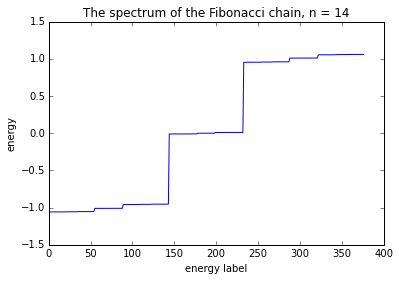

In [54]:
""" wow, such spectrum! much gaps! """

plt.title('The spectrum of the Fibonacci chain, n = ' + str(n))
plt.xlabel('energy label')
plt.ylabel('energy')
#plt.axis([0,L+1,-2.,2.])
plt.plot(val)
plt.show()

In [55]:
""" compute the propagator and the on-site presence probability """

# list of propagators in time t from position x
def K(t, x):
    psi0 = vec[x]
    expH = np.array([exp(- 1j*t*e) for e in val])
    return vec.dot(expH*psi0)

# list of on-site presence probabilities at time t, starting localized at site x
def I(t, x):
    psi0 = vec[x]
    expH = np.array([exp(- 1j*t*e) for e in val])
    return abs(vec.dot(expH*psi0))**2

In [56]:
""" timing tests """

start_time = time.time()
K(0,0)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.005130767822265625 seconds ---


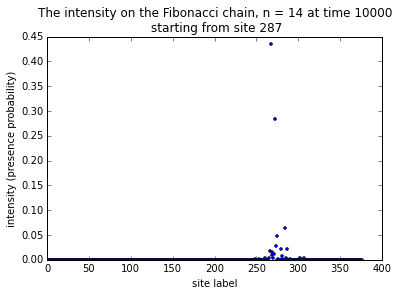

In [57]:
""" wow, such intensity! much spreading! """

x = 287
t = 10**4
plt.title('The intensity on the Fibonacci chain, n = '+str(n)+' at time '+str(t)+'\n starting from site '+str(x))
plt.xlabel('site label')
plt.ylabel('intensity (presence probability)')
#plt.axis([-1,L+1,-2.,2.])
plt.plot(I(t,x),'o',markersize=3.)
plt.show()

In [58]:
""" compute the q-average at time t, starting site orig """

def P(orig,t,q):
    dist = np.array([abs(float(x-orig)/float(L))**q for x in range(L)])
    return dist.dot(I(t,orig))

In [59]:
tRange = 10**np.arange(-1,4,.001)
#tRange = np.arange(0,30,.2)
orig = 287
plist = [P(orig,t,2.) for t in tRange]

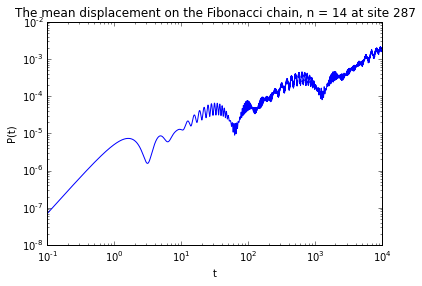

In [60]:
plt.title('The mean displacement on the Fibonacci chain, n = ' + str(n) + ' at site ' + str(orig))
plt.xlabel('t')
plt.ylabel('P(t)')
#plt.axis([0,L+1,-2.,2.])
plt.loglog(tRange, plist,'-',markersize=3.)
plt.show()

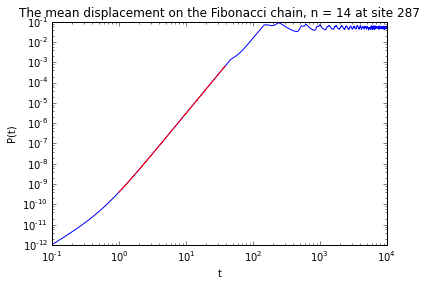

In [42]:
""" Lineart regression of the data """

logtRange = np.arange(0,1.6,.02)
tRange2 = 10**logtRange
plist2 = [P(orig,t,4.) for t in tRange2]

plt.title('The mean displacement on the Fibonacci chain, n = ' + str(n) + ' at site ' + str(orig))
plt.xlabel('t')
plt.ylabel('P(t)')
#plt.axis([0,L+1,-2.,2.])
plt.loglog(tRange, plist,'-',markersize=3.)
plt.loglog(tRange2, plist2,'-,r',markersize=3.)
plt.show()

# data in log-log scale
logP = [math.log(p) for p in plist2]
logT = [math.log(t) for t in tRange2]

slope, intercept, r_value, p_value, std_err = stats.linregress(logT,logP)

In [43]:
slope, r_value

(3.9487735515851088, 0.99994826396792202)

## Average over starting sites

$$ P(t;q) = \lim_{L \rightarrow \infty} \frac{1}{L} \sum_i P_i(t;q)$$ 
Up sides: $t \rightarrow P(t;q)$ is more regular that $t \rightarrow P_i(t;q)$, furthermore it captures in one number, $\sigma_q$, the global diffusion properties of the chain.

Dow sides: some info is lost, in particular performing the average kills the $log$-periodic oscillations characteristic of the underlying discrete scaling symmetry of the system.

### Numerics
Numerically, taking only a sample of starting sites is sufficient in order to have a good approximation of the average. The sample size must increase as $\rho \rightarrow 0$, and 10 percent of the sites seems to be good.

In [61]:
""" averaging over all starting sites """

def Pav(t, q):
    av = 0
    for orig in range(L):
        av += P(orig,t,q)
    return av/L

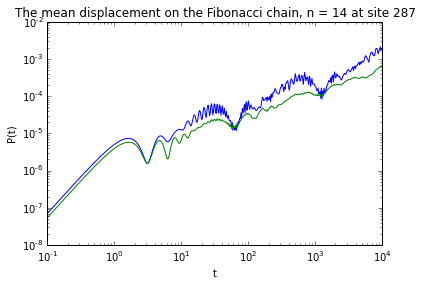

In [62]:
# compare averaged and non-averaged diffusions

# non averaged
tRange = 10**np.arange(-1,4,.01)
orig = 287
plist = [P(orig,t,2.) for t in tRange]

# averaged
avplist = [Pav(t,2.) for t in tRange]

# plot
plt.title('The mean displacement on the Fibonacci chain, n = ' + str(n) + ' at site ' + str(orig))
plt.xlabel('t')
plt.ylabel('P(t)')
plt.loglog(tRange, plist,'-',markersize=3.)
plt.loglog(tRange, avplist,'-',markersize=3.)
plt.show()

In [63]:
""" averaging over some sites chosen randomly """

# samp_size: number of sites over which to average
def Prand(t, q, samp_size):
    starting_pos = random.sample(range(L), samp_size)
    av = 0
    for orig in starting_pos:
        av += P(orig,t,q)
    return av/samp_size

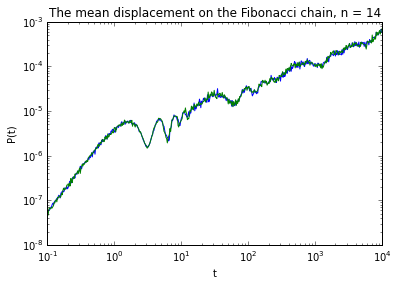

In [64]:
# is the graph dependant on the drawn collection of samples?

# draw 1
p1 = [Prand(t, 2., 50) for t in tRange]
# draw 2
p2 = [Prand(t, 2., 50) for t in tRange]

plt.title('The mean displacement on the Fibonacci chain, n = ' + str(n))
plt.xlabel('t')
plt.ylabel('P(t)')
plt.loglog(tRange, p1,'-',markersize=3.)
plt.loglog(tRange, p2,'-',markersize=3.)
plt.show()

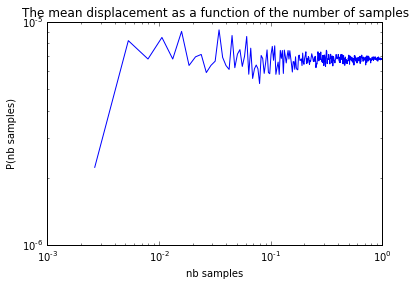

In [65]:
# how many samples do we need?

p = Pav(10., 2.)
samples = range(1,L+1)
ps = [Prand(10., 2., nb) for nb in samples]
plt.title('The mean displacement as a function of the number of samples')
plt.xlabel('nb samples')
plt.ylabel('P(nb samples)')
plt.loglog(np.array(samples)/L, ps,'-',markersize=3.)
plt.show()

In [48]:
l=np.array(range(10))

In [49]:
2*l

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])